In [ ]:
## Important Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *

import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668


In [ ]:
def data_pre_1(df,arg):
  df[arg] = pd.to_datetime(df[arg], format="%m/%d/%Y %H:%M")
  df['Booking_month'] = df[arg].dt.month
  df['Booking_hour'] = df[arg].dt.hour
  df['Booking_day'] = df[arg].dt.dayofweek
  return df

In [ ]:
df_train = data_pre_1(df_train,'datetime')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       8708 non-null   datetime64[ns]
 1   season         8708 non-null   object        
 2   holiday        8708 non-null   int64         
 3   workingday     8708 non-null   int64         
 4   weather        8708 non-null   object        
 5   temp           8708 non-null   float64       
 6   atemp          8708 non-null   float64       
 7   humidity       8708 non-null   int64         
 8   windspeed      8708 non-null   float64       
 9   Total_Booking  8708 non-null   int64         
 10  Booking_month  8708 non-null   int64         
 11  Booking_hour   8708 non-null   int64         
 12  Booking_day    8708 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(7), object(2)
memory usage: 884.5+ KB


In [ ]:
df_train.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_Booking    0
Booking_month    0
Booking_hour     0
Booking_day      0
dtype: int64

In [ ]:
np.round(df_train.corr(),3)

,holiday,workingday,temp,atemp,humidity,windspeed,Total_Booking,Booking_month,Booking_hour,Booking_day
holiday,1.000,-0.250,-0.000,-0.006,-0.005,0.008,-0.004,0.001,0.004,-0.184
workingday,-0.250,1.000,0.032,0.026,-0.009,0.013,0.012,-0.001,0.002,-0.707
temp,-0.000,0.032,1.000,0.984,-0.066,-0.028,0.397,0.256,0.147,-0.040
atemp,-0.006,0.026,0.984,1.000,-0.044,-0.069,0.393,0.263,0.142,-0.043
humidity,-0.005,-0.009,-0.066,-0.044,1.000,-0.320,-0.308,0.203,-0.273,-0.028
windspeed,0.008,0.013,-0.028,-0.069,-0.320,1.000,0.092,-0.158,0.133,-0.023
Total_Booking,-0.004,0.012,0.397,0.393,-0.308,0.092,1.000,0.170,0.400,-0.006
Booking_month,0.001,-0.001,0.256,0.263,0.203,-0.158,0.170,1.000,-0.006,-0.004
Booking_hour,0.004,0.002,0.147,0.142,-0.273,0.133,0.400,-0.006,1.000,-0.007
Booking_day,-0.184,-0.707,-0.040,-0.043,-0.028,-0.023,-0.006,-0.004,-0.007,1.000


## Vizualization

In [ ]:
df_train.nunique()

datetime         8708
season              4
holiday             2
workingday          2
weather             4
temp               49
atemp              60
humidity           88
windspeed          28
Total_Booking     797
Booking_month      12
Booking_hour       24
Booking_day         7
dtype: int64

### Box Plot

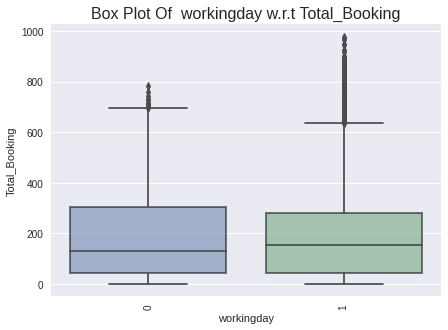

In [ ]:
box_1(df_train,'workingday','Total_Booking',7,5)

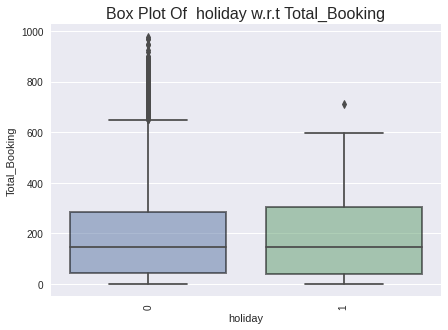

In [ ]:
box_1(df_train,'holiday','Total_Booking',7,5)

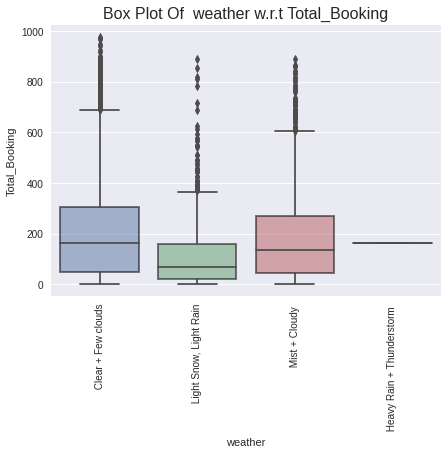

In [ ]:
box_1(df_train,'weather','Total_Booking',7,5)

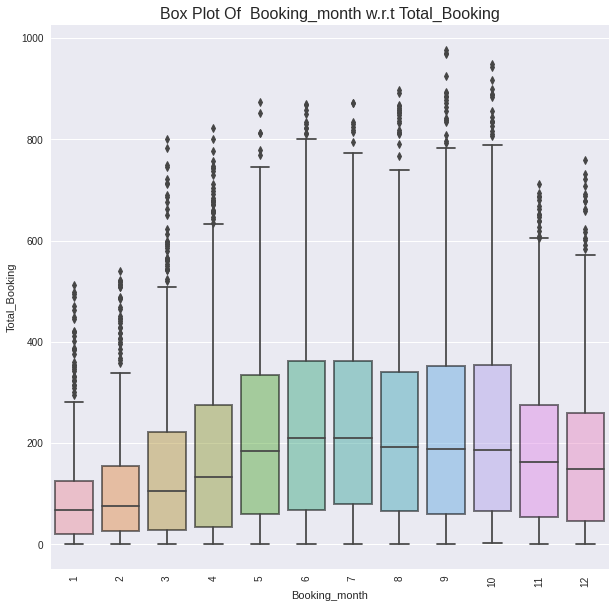

In [ ]:
box_1(df_train,'Booking_month','Total_Booking',10,10)

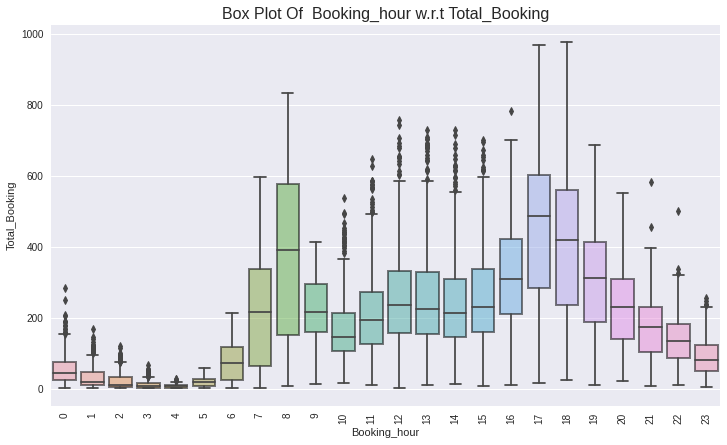

In [ ]:
box_1(df_train,'Booking_hour','Total_Booking',12,7)

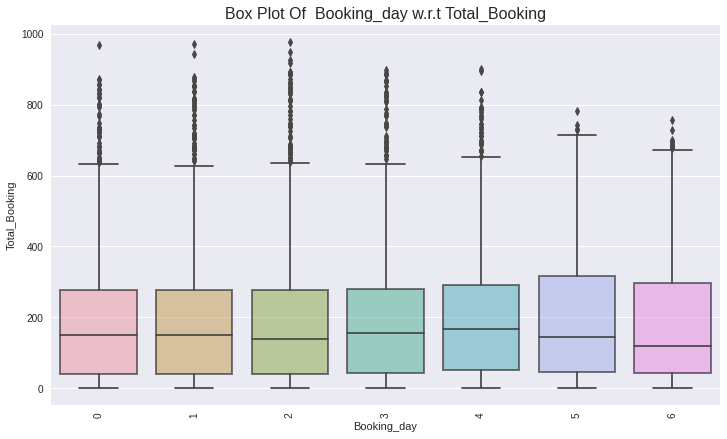

In [ ]:
box_1(df_train,'Booking_day','Total_Booking',12,7)

### Normal Distribution

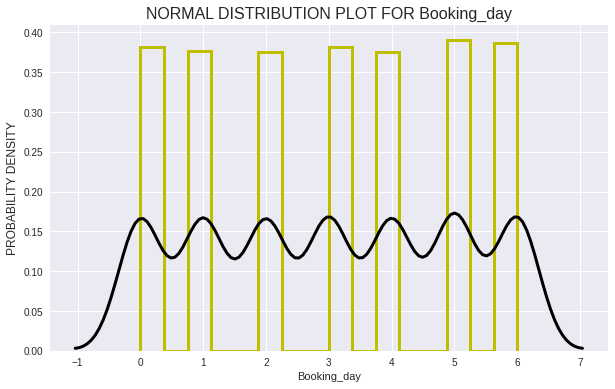

In [ ]:
Nd_2(df_train,'Booking_day')

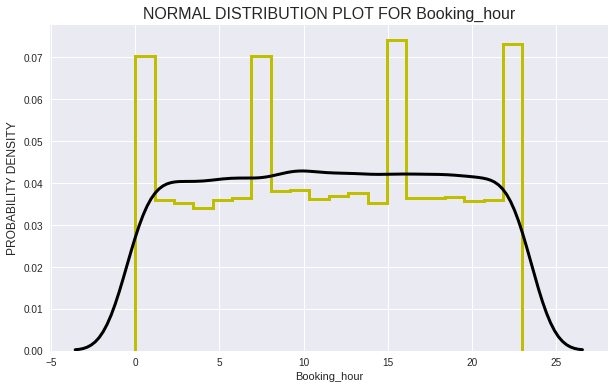

In [ ]:
 Nd_2(df_train,'Booking_hour')

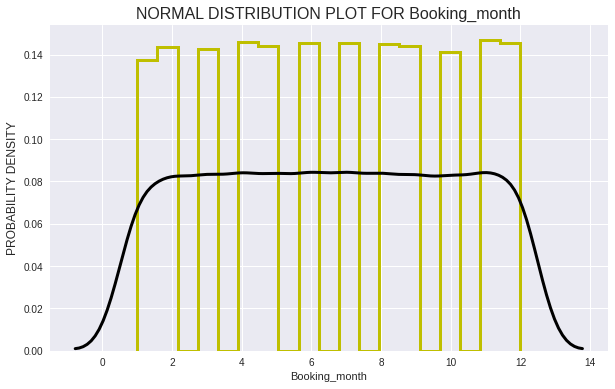

In [ ]:
 Nd_2(df_train,'Booking_month')

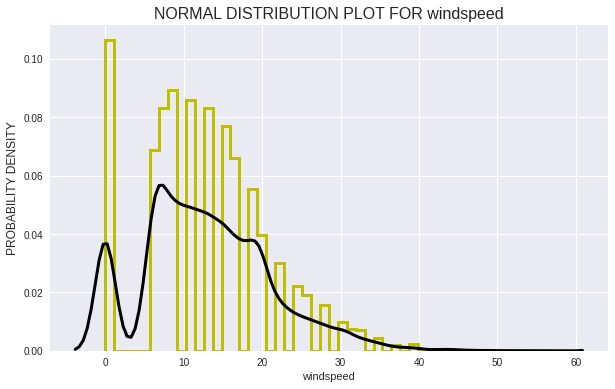

In [ ]:
 Nd_2(df_train,'windspeed')

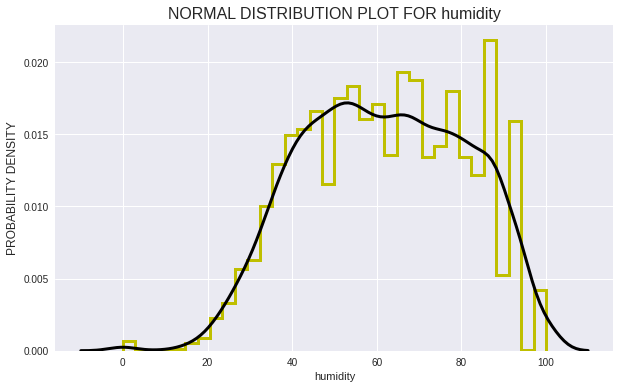

In [ ]:
 Nd_2(df_train,'humidity')

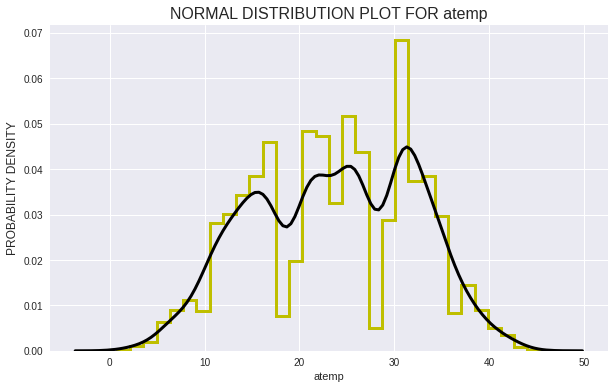

In [ ]:
 Nd_2(df_train,'atemp')

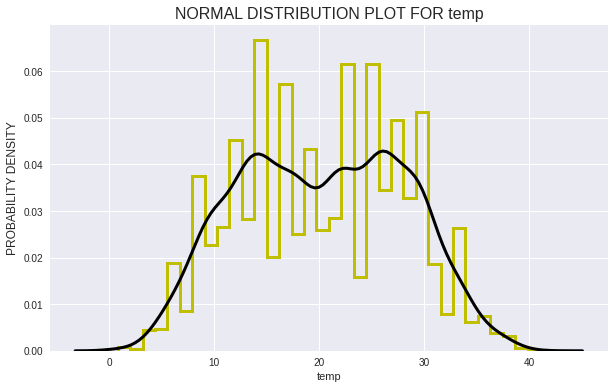

In [ ]:
 Nd_2(df_train,'temp')

In [ ]:
df_train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'Total_Booking', 'Booking_month',
       'Booking_hour', 'Booking_day'],
      dtype='object')

(10.5, -0.5)

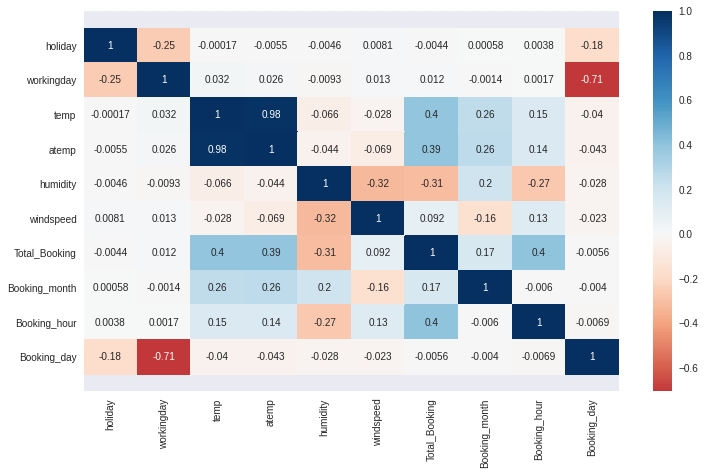

In [ ]:
fig, ax=plt.subplots(figsize=(12,7))
sns.heatmap(df_train.corr(),center=0, cmap='RdBu',annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

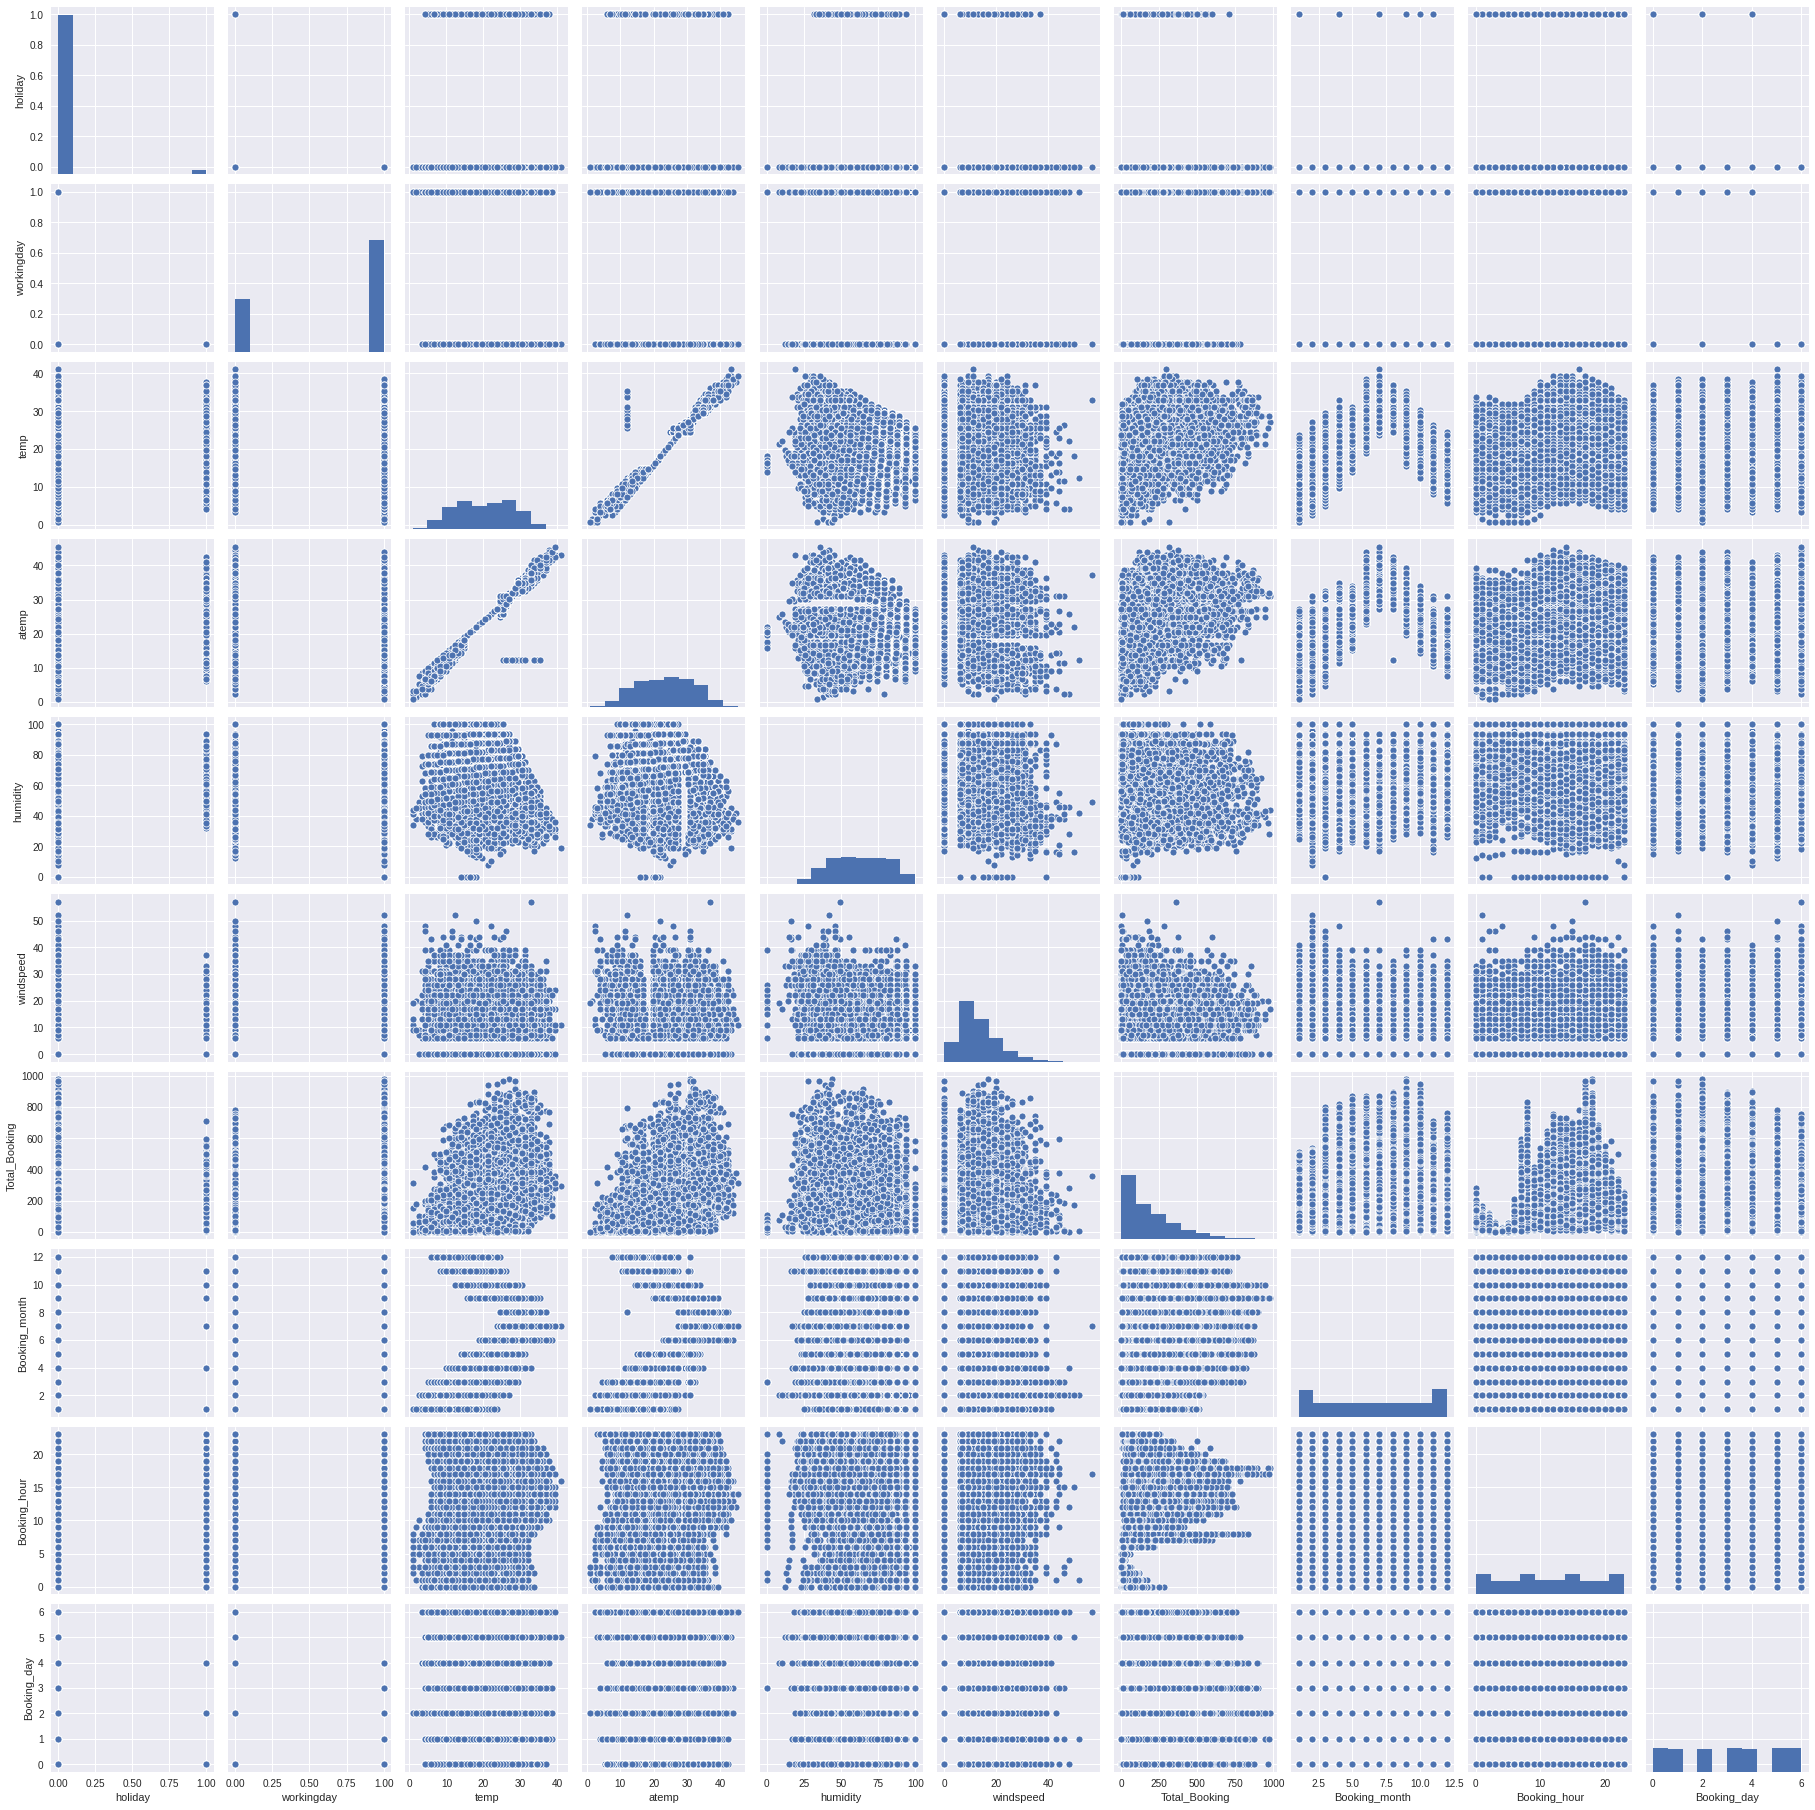

In [ ]:
sns.pairplot(df_train,diag_kind="hist")

In [ ]:
# bar_value(df_train,'df',1,5,6,'test')

## Hypothesis

### HYP1 :High cab demands --> office peak hours, Low cab demand--> Night

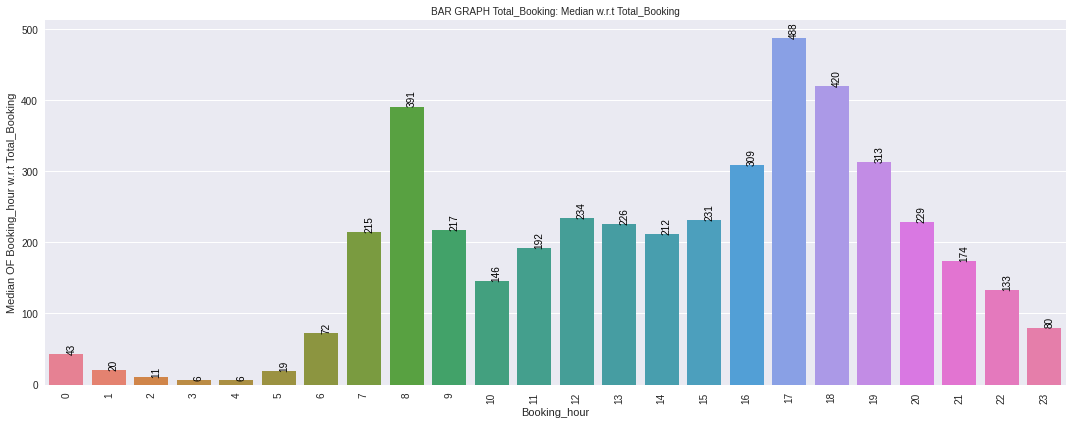

In [ ]:
bar_value(df_train,'Booking_hour','Total_Booking',1,15,6,'Total_Booking')

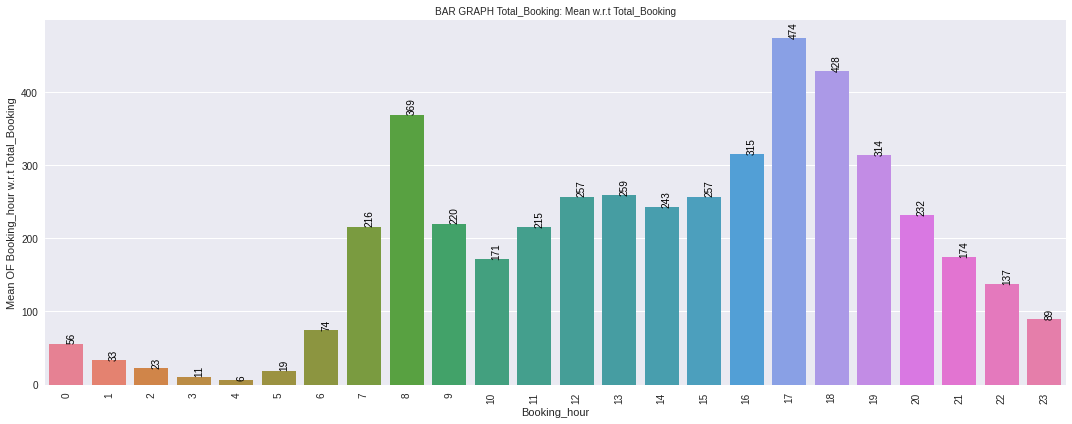

In [ ]:
bar_value(df_train,'Booking_hour','Total_Booking',2,15,6,'Total_Booking')

### HYP2

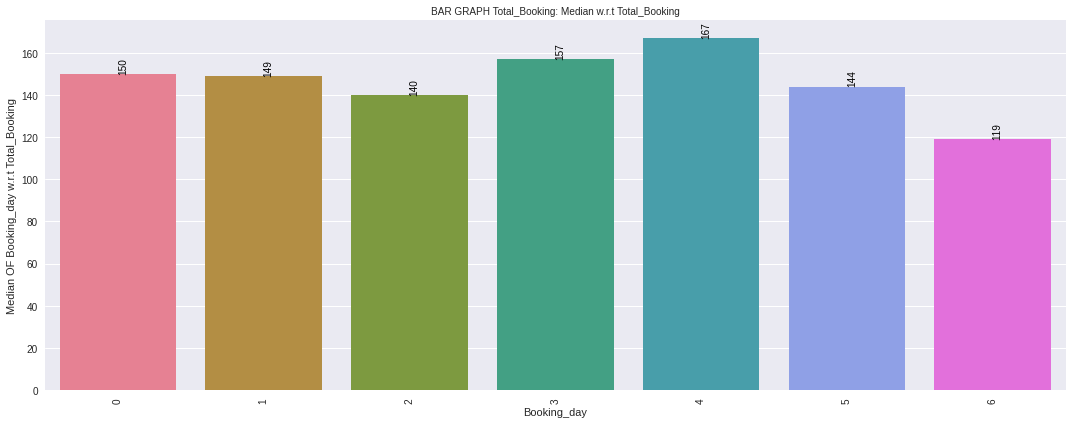

In [ ]:
bar_value(df_train,'Booking_day','Total_Booking',1,15,6,'Total_Booking')


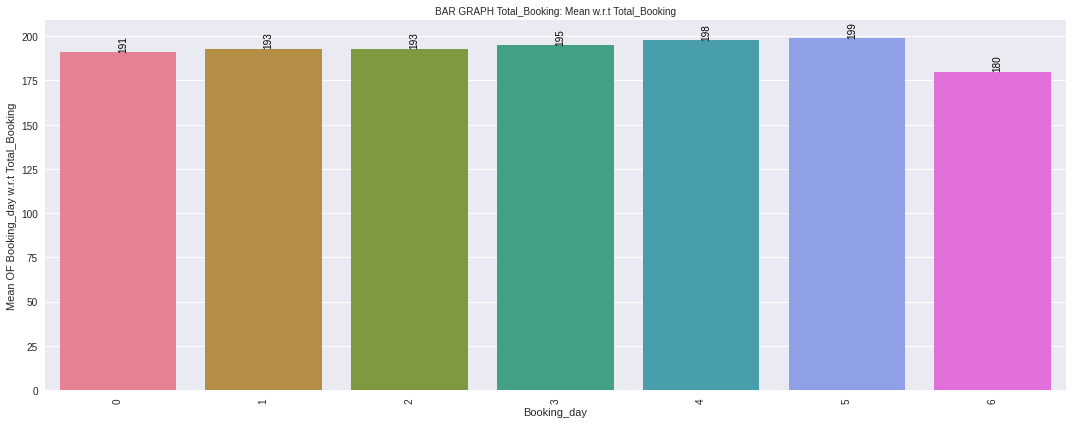

In [ ]:
bar_value(df_train,'Booking_day','Total_Booking',2,15,6,'Total_Booking')


### HYP3

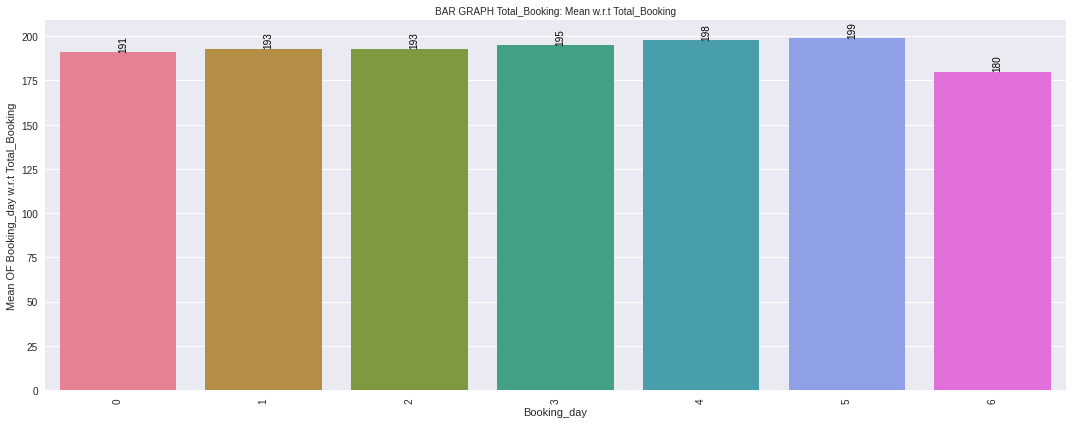

In [ ]:
bar_value(df_train,'Booking_day','Total_Booking',2,15,6,'Total_Booking')

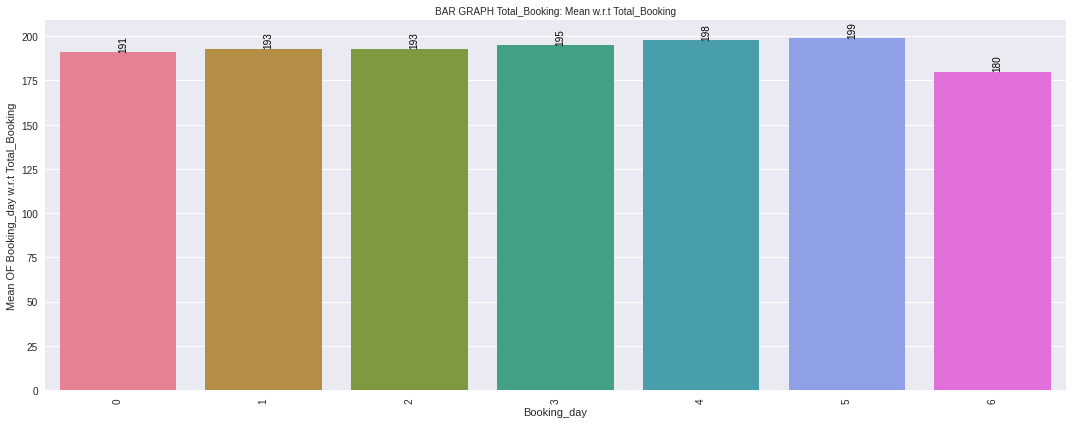

In [ ]:
bar_value(df_train,'Booking_day','Total_Booking',2,15,6,'Total_Booking')

### HYP4


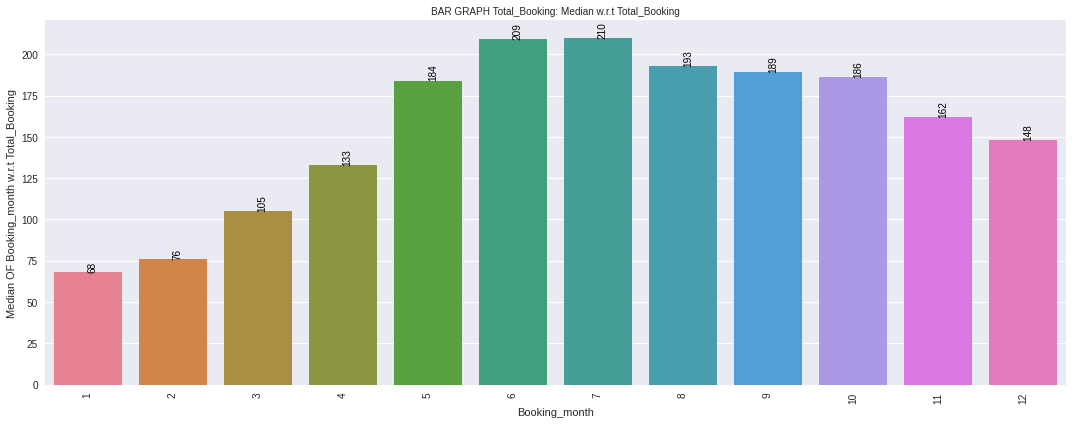

In [ ]:
bar_value(df_train,'Booking_month','Total_Booking',1,15,6,'Total_Booking')

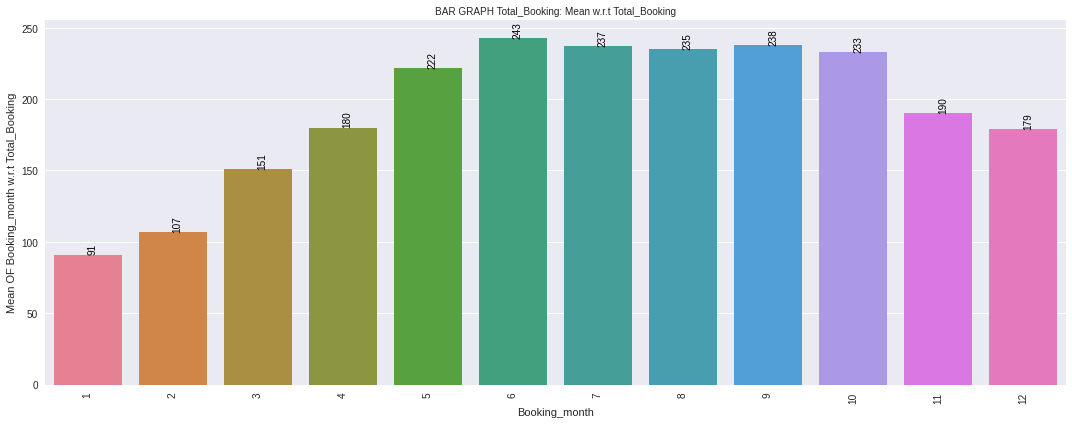

In [ ]:
bar_value(df_train,'Booking_month','Total_Booking',2,15,6,'Total_Booking')

### HYP5

In [ ]:
df_train.groupby(['humidity'])['Total_Booking'].mean()

humidity
0       30.833333
8       77.000000
10     107.000000
12      29.000000
13      17.000000
          ...    
92      76.000000
93      78.145570
94      94.657258
96      71.000000
100     66.710280
Name: Total_Booking, Length: 88, dtype: float64

In [ ]:
df_train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_Booking,Booking_month,Booking_hour,Booking_day
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.028480,0.680294,20.243020,23.655552,61.649173,12.843891,193.007005,6.528709,11.581190,3.015618
std,0.166348,0.466389,7.813494,8.501107,19.199578,8.190314,181.552211,3.440879,6.890534,2.006246
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,13.940000,16.665000,46.000000,7.001500,43.000000,4.000000,6.000000,1.000000
50%,0.000000,1.000000,20.500000,24.240000,61.000000,12.998000,148.000000,7.000000,12.000000,3.000000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900,286.000000,10.000000,18.000000,5.000000
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900,977.000000,12.000000,23.000000,6.000000


In [ ]:
df_train.describe(include=[np.object])

,season,weather
count,8708,8708
unique,4,4
top,Summer,Clear + Few clouds
freq,2197,5753


<Figure size 720x432 with 0 Axes>

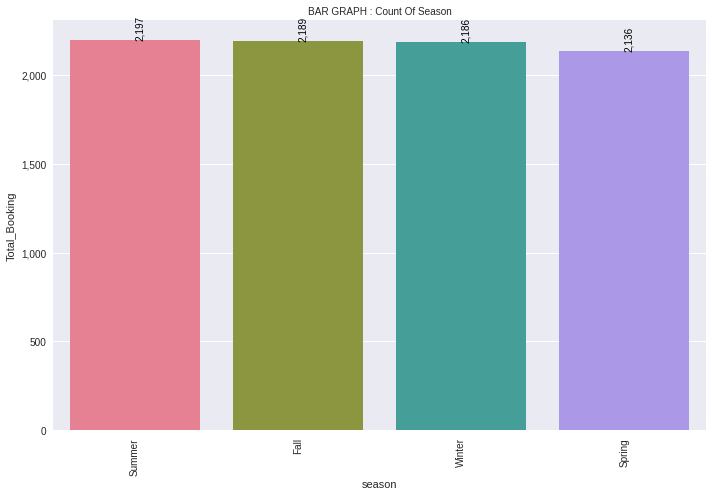

In [ ]:
plot_count_2(df_train,'season',10,7,'Total_Booking','Of Season')#(df_2,col,w,h,y,comment)

<Figure size 720x432 with 0 Axes>

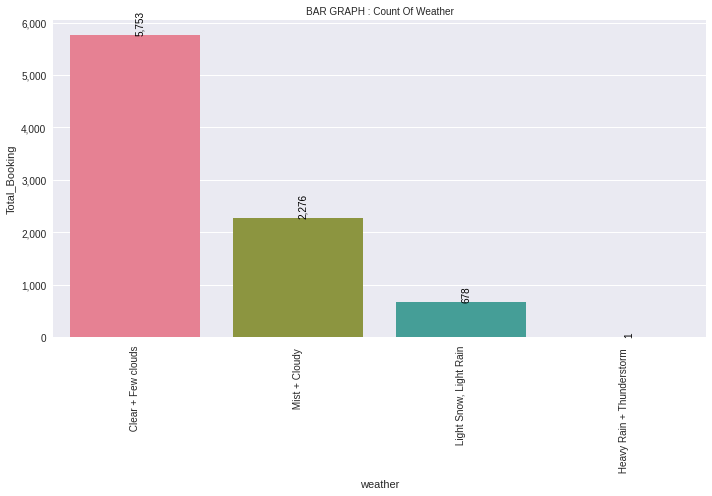

In [ ]:
plot_count_2(df_train,'weather',10,7,'Total_Booking','Of Weather')#(df_2,col,w,h,y,comment)

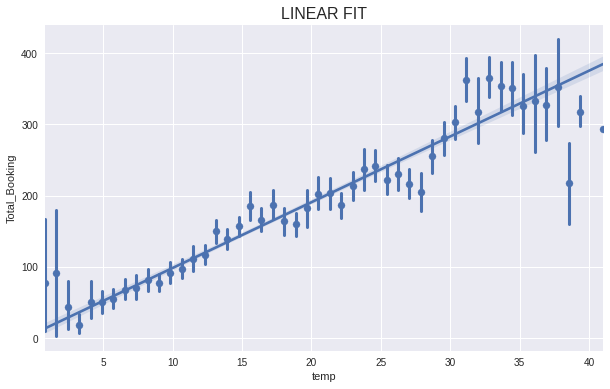

In [ ]:
reg_dis(df_train, 'temp', 'Total_Booking')

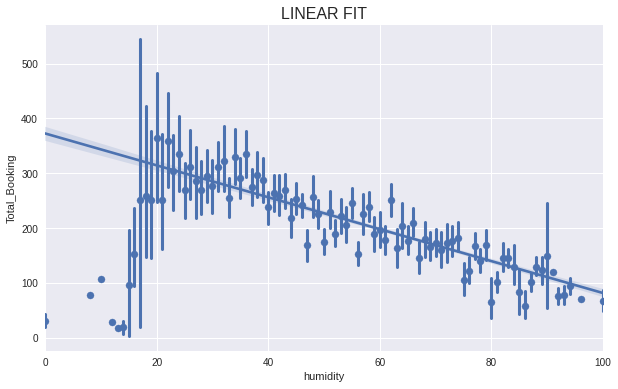

In [ ]:
reg_dis(df_train, 'humidity', 'Total_Booking')


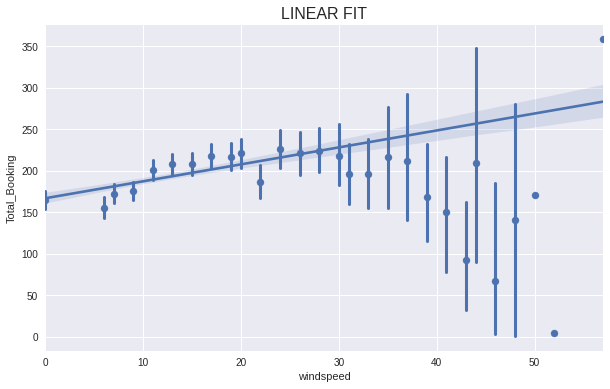

In [ ]:
reg_dis(df_train, 'windspeed', 'Total_Booking')#windspeed

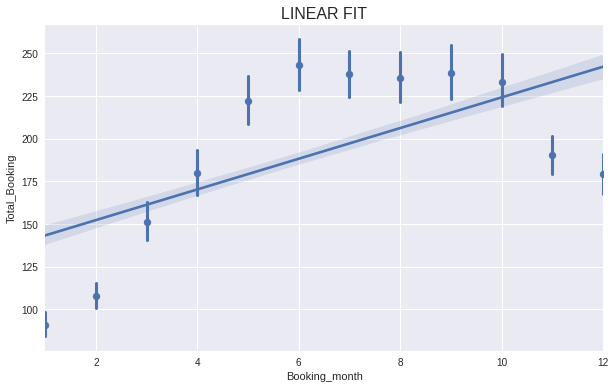

In [ ]:
reg_dis(df_train, 'Booking_month', 'Total_Booking')

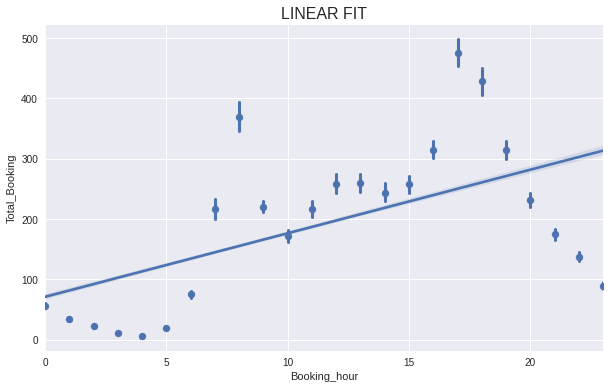

In [ ]:
reg_dis(df_train, 'Booking_hour', 'Total_Booking')


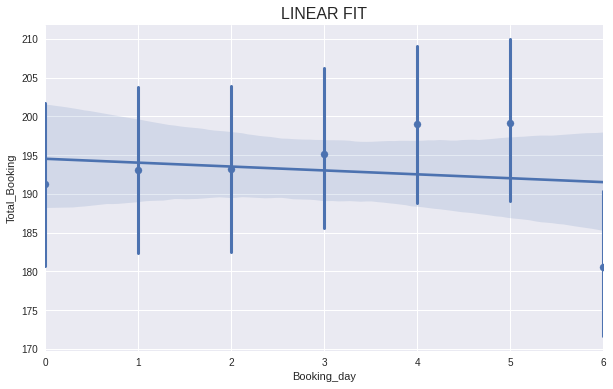

In [ ]:
reg_dis(df_train, 'Booking_day', 'Total_Booking')


In [ ]:
se = ['temp','atemp', 'humidity', 'windspeed', 'Total_Booking', 'Booking_month','Booking_hour', 'Booking_day']

In [ ]:
df_cont = df_train[se]

In [ ]:
df_cont.skew()

temp             0.000066
atemp           -0.110449
humidity        -0.080411
windspeed        0.565611
Total_Booking    1.237928
Booking_month   -0.003196
Booking_hour    -0.013267
Booking_day     -0.012548
dtype: float64

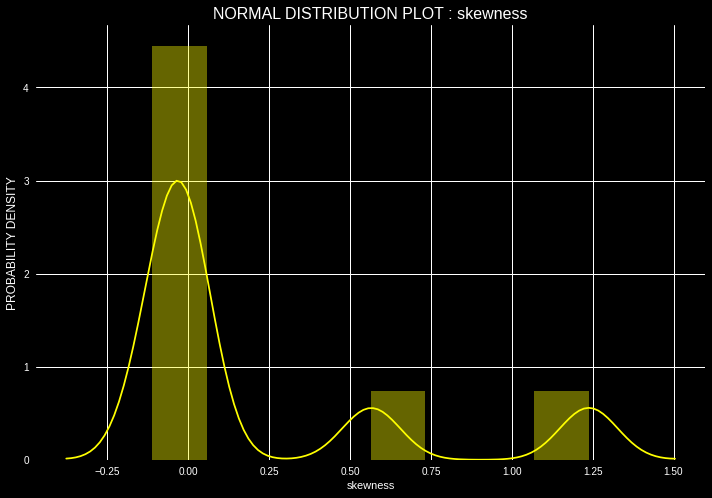

In [ ]:
sat_dis(df_cont,'yellow','skewness',1)

In [ ]:
df_cont.kurt()

temp            -0.920463
atemp           -0.857699
humidity        -0.761145
windspeed        0.523940
Total_Booking    1.311722
Booking_month   -1.210402
Booking_hour    -1.188574
Booking_day     -1.257688
dtype: float64

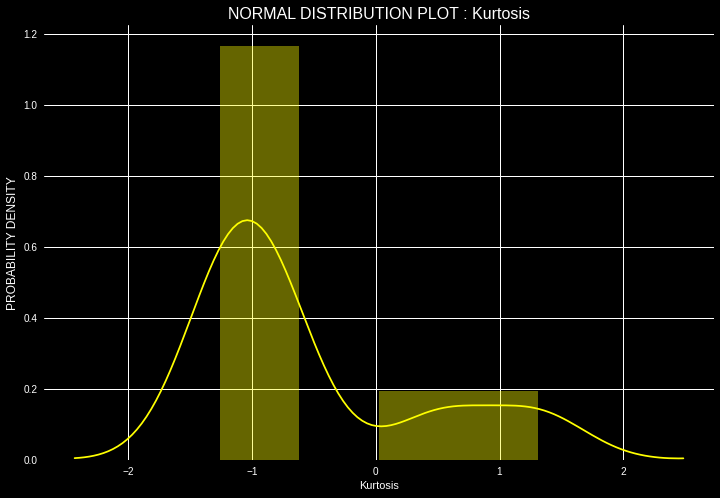

In [ ]:
sat_dis(df_cont,'yellow','Kurtosis',2)

In [ ]:
df_train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'Total_Booking', 'Booking_month',
       'Booking_hour', 'Booking_day'],
      dtype='object')

In [ ]:
se = ['season', 'holiday', 'workingday', 'weather', 'temp',
      'atemp', 'humidity', 'windspeed', 'Total_Booking', 'Booking_month',
      'Booking_hour', 'Booking_day']

In [ ]:
df_1 = df_train[se]

In [ ]:
df_1.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking,Booking_month,Booking_hour,Booking_day
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,5,19,2
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,9,4,2
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,1,9,3
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,11,16,4
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,9,13,1


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         8708 non-null   object 
 1   holiday        8708 non-null   int64  
 2   workingday     8708 non-null   int64  
 3   weather        8708 non-null   object 
 4   temp           8708 non-null   float64
 5   atemp          8708 non-null   float64
 6   humidity       8708 non-null   int64  
 7   windspeed      8708 non-null   float64
 8   Total_Booking  8708 non-null   int64  
 9   Booking_month  8708 non-null   int64  
 10  Booking_hour   8708 non-null   int64  
 11  Booking_day    8708 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 816.5+ KB


In [ ]:
#season,weather

In [ ]:
def data_pre_2(df_1):
  df_1.weather=df_1.weather.str.upper()
  df_1.weather = df_1.weather.str.replace(' ','')
  season_dict ={"Summer" : 5,'Fall' : 6, 'Winter' : 4, 'Spring' : 1}
  df_1.season = df_1.season.map(season_dict)
  weather_dict ={'CLEAR+FEWCLOUDS' : 10, 'MIST+CLOUDY' : 7,'LIGHTSNOW,LIGHTRAIN' : 1,'HEAVYRAIN+THUNDERSTORM' :9.8 }
  df_1.weather = df_1.weather.map(weather_dict)
  return df_1


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         8708 non-null   int64  
 1   holiday        8708 non-null   int64  
 2   workingday     8708 non-null   int64  
 3   weather        8708 non-null   float64
 4   temp           8708 non-null   float64
 5   atemp          8708 non-null   float64
 6   humidity       8708 non-null   int64  
 7   windspeed      8708 non-null   float64
 8   Total_Booking  8708 non-null   int64  
 9   Booking_month  8708 non-null   int64  
 10  Booking_hour   8708 non-null   int64  
 11  Booking_day    8708 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 816.5 KB


## Data Split

In [ ]:
X = df_2.drop(['Total_Booking'],axis=1)
Y = df_2['Total_Booking']

In [ ]:
X_train, X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.25, random_state=42)

In [ ]:
## Loss Metrics
def metrics_re(y_true,y_pred):
  MSE = mean_absolute_error(y_true, y_pred)
  R2 = r2_score(y_true, y_pred)
  print("R2 Score : ",R2)
  print("MAE : ",MSE)
  return 

## Basline Model

In [ ]:
rr_bl_model = Ridge()
rr_bl_model.fit(X_train,Y_train)

# train_r2 = r2_score(Y_train,rr_bl_model.predict(X_train))
# test_r2 = r2_score(Y_test,rr_bl_model.predict(X_test))


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
metrics_re(Y_train,rr_bl_model.predict(X_train)) # Train score over Train data

R2 Score :  0.3319881015272993
MAE :  109.14482057440351


In [ ]:
metrics_re(Y_test,rr_bl_model.predict(X_test)) # Test score over Train Data

R2 Score :  0.35236494752743597
MAE :  107.85536267479206


In [ ]:
param_grid ={'n_estimators' : [50]}
rf_model =RandomForestRegressor()
gd_model =GridSearchCV(rf_model,param_grid=param_grid,cv=5,scoring='neg_mean_absolute_error')
gd_model.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
gd_model.best_params_

{'n_estimators': 50}

In [ ]:
gd_model.best_score_

-45.79795654579945

In [ ]:
df_test_1 =data_pre_1(df_test,'datetime')

In [ ]:
df_test_2 = data_pre_2(df_test_1)

In [ ]:
X_test_data = df_test_2.drop(['Total_Booking','datetime'],axis=1)
Y_test_data = df_test_2['Total_Booking']

In [ ]:
y_test_prd_rr_bl = rr_bl_model.predict(X_test_data)

In [ ]:
y_test_prd_rf = gd_model.predict(X_test_data)

In [ ]:
metrics_re(Y_test_data,rr_bl_model.predict(X_test_data)) # Test score over Test data ; Ridge Regression

R2 Score :  0.3436690367876045
MAE :  107.73209786854098


In [ ]:
metrics_re(Y_test_data,gd_model.predict(X_test_data)) # Test score over Test data ; Randomfprest Regression

R2 Score :  0.8604584550157339
MAE :  44.08094433512615


In [ ]:
##

## Multiple Linear Regression

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
metrics_re(Y_test_data,reg.predict(X_test_data))

R2 Score :  0.343667857625631
MAE :  107.73235953763958


In [ ]:
##

In [ ]:
#

# XGBOOST

In [ ]:
xgb =xgb.XGBRegressor()

In [ ]:
xgb.fit(X_train,Y_train)

[18:38:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
metrics_re(Y_train,xgb.predict(X_train))

R2 Score :  0.8102643721909621
MAE :  54.52804978529302


In [ ]:
metrics_re(Y_test_data,xgb.predict(X_test_data))

R2 Score :  0.7970155419348427
MAE :  55.73495879090631


In [ ]:
param_grid ={'n_estimators' : [10,20,50,100,200,500,1000],
             'learning_rate' : [0.5,0.1,0.05],
             'min_child_weight':[1,3,5,6,7,10],
             'reg_lambda' : [0.1,0.5,0.8,1],
             'reg_alpha' : [0,0.1,0.5,0.8,1]}
gd_model_xgboost =GridSearchCV(xgb,param_grid=param_grid,cv=5)
gd_model_xgboost.fit(X_train,Y_train)

Streaming output truncated to the last 5000 lines.
[19:49:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:49:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:49:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:49:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:49:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:49:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:49:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:49:49] WARNING: /workspace/src/objective/regression_obj.

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.5, 0.1, 0.05],
                         'min_child_weight': [1, 3, 5, 6, 7, 10],
            

In [ ]:
metrics_re(Y_train,gd_model_xgboost.predict(X_train))

R2 Score :  0.902851504984552
MAE :  39.60714751163954


In [ ]:
# gd_model_xgboost.best_score_

-47.74644135104089

In [ ]:
gd_model_xgboost.best_params_

{'learning_rate': 0.1,
 'min_child_weight': 6,
 'n_estimators': 1000,
 'reg_alpha': 0.8,
 'reg_lambda': 0.5}